In [1]:
import pandas as pd
import os
os.chdir("/home/piai/문서/빅데이터프로젝트")
os.getcwd()

'/home/piai/문서/빅데이터프로젝트'

In [2]:
df = pd.read_csv("./df.csv", encoding = 'euc-kr')
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

In [70]:
# 목표 달성 했는지 안했는지 여부 확인하는 열 추가
df['성공여부']=df['상품목표취급금액'] - df['매출액']
df['성공여부'] = ['실패' if x > 0 else '성공' for x in df['성공여부']]

계절
여름    27251399200
가을    27178553100
겨울    26456450700
봄     25913314800
Name: 매출액, dtype: int64


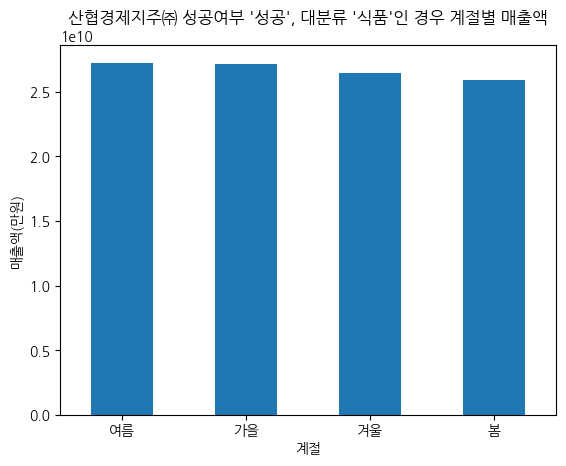

In [71]:
import pandas as pd
import matplotlib.pyplot as plt


# '성공여부' 열 '성공'이고 '대분류'가 '식품'인 경우 필터링
df_filtered = df[(df['성공여부'] == '성공') & (df['대분류'] == '식품') & (df['협력사명'] == '산협경제지주㈜')]

# '계절' 별 '매출액' 총합 구하기
df_season_sum = df_filtered.groupby('계절')['매출액'].sum()

# 총합이 큰 순서대로 정렬
df_season_sum = df_season_sum.sort_values(ascending=False)

# 결과 출력
print(df_season_sum)

# 그래프 그리기
df_season_sum.plot(kind='bar', rot=0)

# 그래프 제목 설정
plt.title("산협경제지주㈜ 성공여부 '성공', 대분류 '식품'인 경우 계절별 매출액")

# 그래프 축 레이블 설정
plt.xlabel("계절")
plt.ylabel("매출액(만원)")

# 그래프 출력
plt.show()


Text(0, 0.5, '요일')

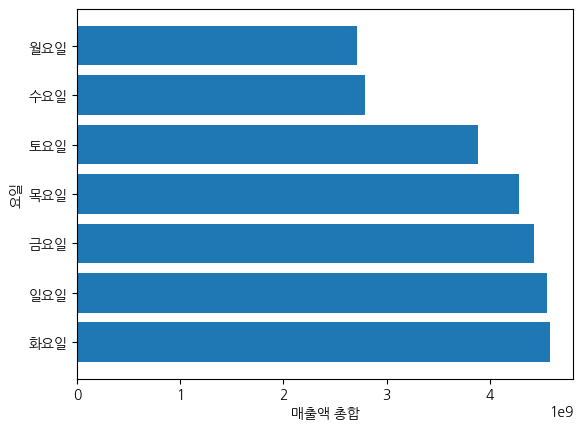

In [72]:
import matplotlib.pyplot as plt

# '성공여부'가 '성공'이고, '대분류'가 '식품', '계절'이 '여름'인 데이터 필터링
df_filtered = df[(df['성공여부'] == '성공') & (df['대분류'] == '식품') & (df['계절'] == '여름')  & (df['협력사명'] == '산협경제지주㈜')]

# 각 요일별 매출액 총합 계산
df_day_sum = df_filtered.groupby('요일')['매출액'].sum()

# 매출액 총합이 큰 순으로 정렬하여 그래프 출력
plt.barh(df_day_sum.sort_values(ascending=False).index, df_day_sum.sort_values(ascending=False).values)
plt.xlabel('매출액 총합')
plt.ylabel('요일')


In [73]:
import pandas as pd


# 시간대 구분 함수 정의
def get_time_category(hour):
    hour = int(hour)
    if 0 <= hour < 3:
        return '심야'
    elif 3 <= hour < 6:
        return '새벽'
    elif 6 <= hour < 9:
        return '아침'
    elif 9 <= hour < 12:
        return '오전'
    elif 12 <= hour < 15:
        return '점심'
    elif 15 <= hour < 18:
        return '오후'
    elif 18 <= hour < 21:
        return '저녁'
    elif 21 <= hour < 24:
        return '야간'

# '시간대' 열 생성
df['시간대'] = df['시작시간'].apply(get_time_category)



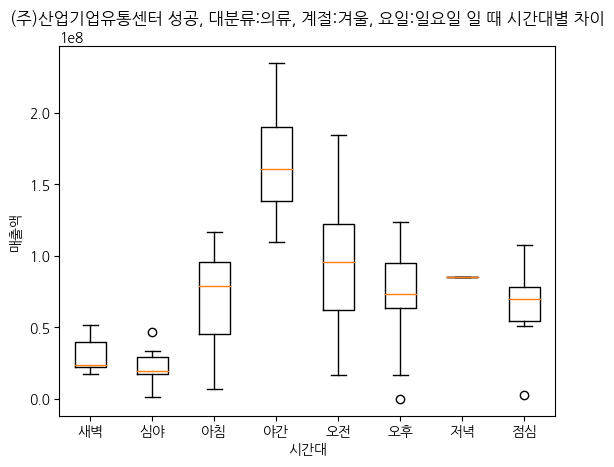

In [74]:
# '성공여부'가 '성공'이고, '대분류'가 '식품', '계절'이 '여름', '요일'이 '목요일'에 해당하는 데이터 필터링
df_filtered = df[(df['성공여부'] == '성공') & (df['대분류'] == '식품') & (df['계절'] == '여름') & (df['요일'] == '화요일') & (df['협력사명'] ==  '산협경제지주㈜')]

# '시간대'별 '매출액'을 리스트로 추출
hours = sorted(list(set(df_filtered['시간대'])))
data = [df_filtered[df_filtered['시간대'] == hour]['매출액'].tolist() for hour in hours]

# box plot 그리기
fig, ax = plt.subplots()
ax.boxplot(data, labels=hours)
ax.set_title('(주)산업기업유통센터 성공, 대분류:의류, 계절:겨울, 요일:일요일 일 때 시간대별 차이')
ax.set_xlabel('시간대')
ax.set_ylabel('매출액')
plt.show()

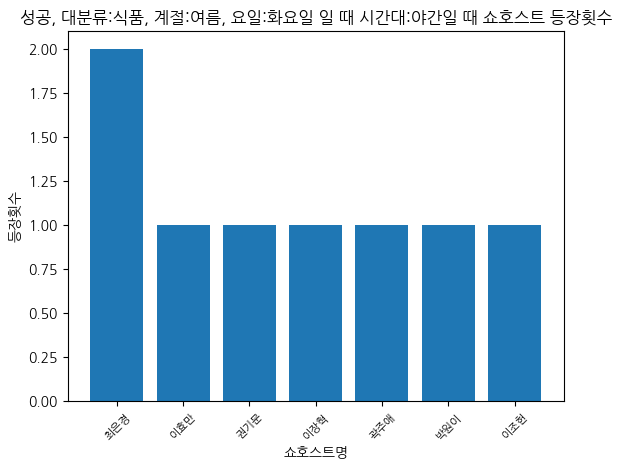

In [75]:
# '성공여부'가 '성공'이고, '대분류'가 '식품', '계절'이 '여름', '요일'이 '목요일', '시간대'가 '오전'에 해당하는 데이터 필터링
df_filtered = df[(df['성공여부'] == '성공') & (df['대분류'] == '식품') & (df['계절'] == '여름') & (df['요일'] == '화요일') & (df['시간대'] == '야간')& (df['협력사명'] ==  '산협경제지주㈜')]

# 'SH' 등장 횟수 추출
freq_dict = {}

for idx, row in df_filtered.iterrows():
    names = row['SH'].split(',')
    for name in names:
        if name not in freq_dict:
            freq_dict[name] = 0
        freq_dict[name] += 1

# 등장 횟수가 큰 순서대로 정렬
sorted_dict = {k: v for k, v in sorted(freq_dict.items(), key=lambda item: item[1], reverse=True)}

# 그래프 생성 
plt.bar(sorted_dict.keys(), sorted_dict.values())
plt.title("성공, 대분류:식품, 계절:여름, 요일:화요일 일 때 시간대:야간일 때 쇼호스트 등장횟수")
plt.xlabel("쇼호스트명")
plt.ylabel("등장횟수")

# x축 라벨 회전 및 fontsize 조간
plt.xticks(rotation=45, fontsize=8)

plt.show()


/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


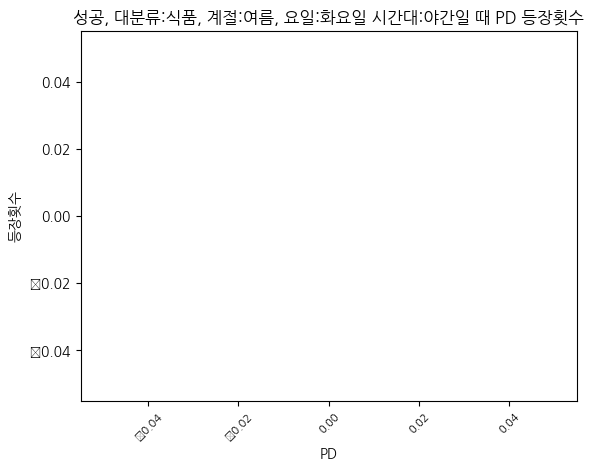

In [76]:
# '성공여부'가 '성공'이고, '대분류'가 '식품', '계절'이 '여름', '요일'이 '목요일', '시간대'가 '오전'에 해당하는 데이터 필터링
df_filtered = df[(df['성공여부'] == '성공') & (df['대분류'] == '의류') & (df['계절'] == '겨울') & (df['요일'] == '일요일') & (df['시간대'] == '야간')& (df['협력사명'] == '산협경제지주㈜')]

# 'SH' 등장 횟수 추출
freq_dict = {}

for idx, row in df_filtered.iterrows():
    names = row['PD'].split(',')
    for name in names:
        if name not in freq_dict:
            freq_dict[name] = 0
        freq_dict[name] += 1

# 등장 횟수가 큰 순서대로 정렬
sorted_dict = {k: v for k, v in sorted(freq_dict.items(), key=lambda item: item[1], reverse=True)}

# 그래프 생성 
plt.bar(sorted_dict.keys(), sorted_dict.values())
plt.title("성공, 대분류:식품, 계절:여름, 요일:화요일 시간대:야간일 때 PD 등장횟수")
plt.xlabel("PD")
plt.ylabel("등장횟수")

# x축 라벨 회전 및 fontsize 조간
plt.xticks(rotation=45, fontsize=8)

plt.show()


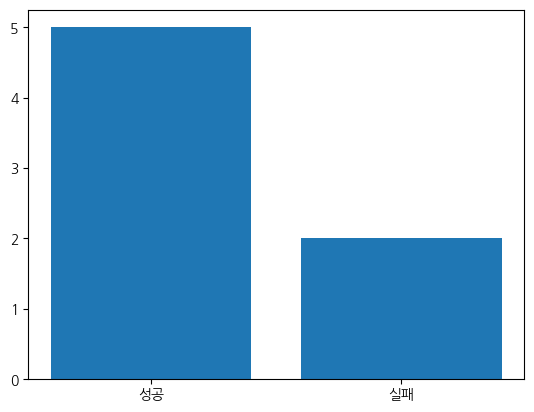

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# 조건에 맞는 행들 추출하기
filtered_df = df[(df['협력사명'] ==  '산협경제지주㈜') & (df['계절'] == '여름') & (df['대분류'] == '식품') & (df['시간대'] == '야간')& (df['요일'] == '일요일')]

# 추출한 행들에서 '성공여부'열 값이 '성공'인 것과 '실패'인 것의 갯수 구하기
success_count = filtered_df[filtered_df['성공여부'] == '성공'].shape[0]
fail_count = filtered_df[filtered_df['성공여부'] == '실패'].shape[0]

# 그래프 그리기
plt.bar(['성공', '실패'], [success_count, fail_count])
plt.show()


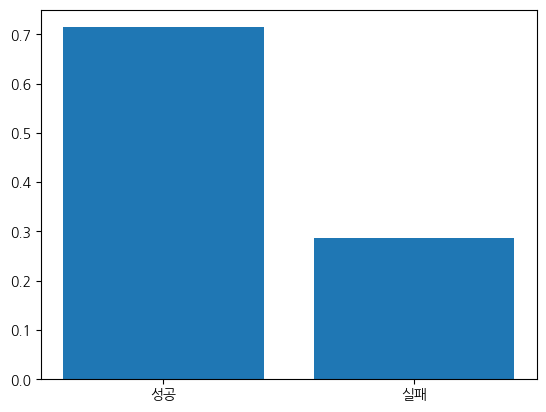

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# 조건에 맞는 행들 추출하기

filtered_df = df[((df['계절'] == '여름') & (df['대분류'] == '식품') & (df['시간대'] == '야간')& (df['요일'] == '일요일')]


# 추출한 행들 중에서 '성공여부'열 값이 '성공'인 것의 비율 계산하기
success_rate = filtered_df[filtered_df['성공여부'] == '성공'].shape[0] / filtered_df.shape[0]

# 그래프 그리기
plt.bar(['성공', '실패'], [success_rate, 1-success_rate])
plt.show()



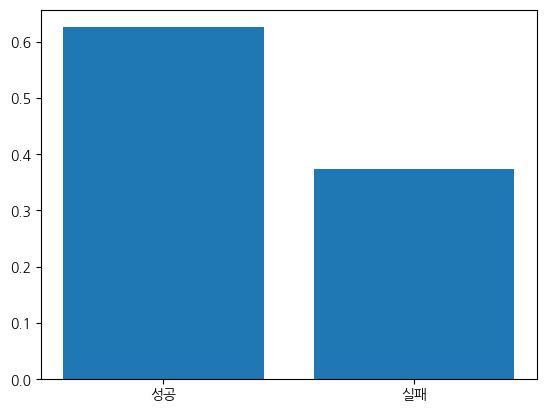

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# 조건에 맞는 행들 추출하기
filtered_df = df[(df['협력사명'] == '산협경제지주㈜')]

# 추출한 행들 중에서 '성공여부'열 값이 '성공'인 것의 비율 계산하기
success_rate = filtered_df[filtered_df['성공여부'] == '성공'].shape[0] / filtered_df.shape[0]

# 그래프 그리기
plt.bar(['성공', '실패'], [success_rate, 1-success_rate])
plt.show()





In [80]:
import numpy as np
def split_and_assign_to_new_column(df):
    # 'SH' 열의 결측치를 빈 문자열로 대체
    df['SH'].replace({np.nan: ''}, inplace=True)

    # 이름이 콤마로 구분되어 있을 경우, 첫 번째 이름은 'SH' 열에, 그 외 이름은 'SH_sub' 열에 저장
    df[['SH', 'SH_sub']] = df['SH'].str.split(',', n=1, expand=True)

# 위에서 정의한 함수를 clothing_df 데이터 프레임에 적용
split_and_assign_to_new_column(df)

In [81]:
df['SH']

0           
1           
2           
3           
4           
        ... 
25651     최석
25652     최석
25653     최석
25654    박원이
25655    최규좌
Name: SH, Length: 25656, dtype: object

In [29]:
# 조합 열을 새로 만들기
df['조합'] = df.apply(lambda row: f"{row['SH']},{row['PD']}" if row['SH'] and row['PD'] else None, axis=1)

print(df['조합'])

0            None
1            None
2            None
3            None
4            None
           ...   
25651      최석,가관석
25652      최석,가관석
25653      최석,가관석
25654    박원이,이상철B
25655     최규좌,최상열
Name: 조합, Length: 25656, dtype: object


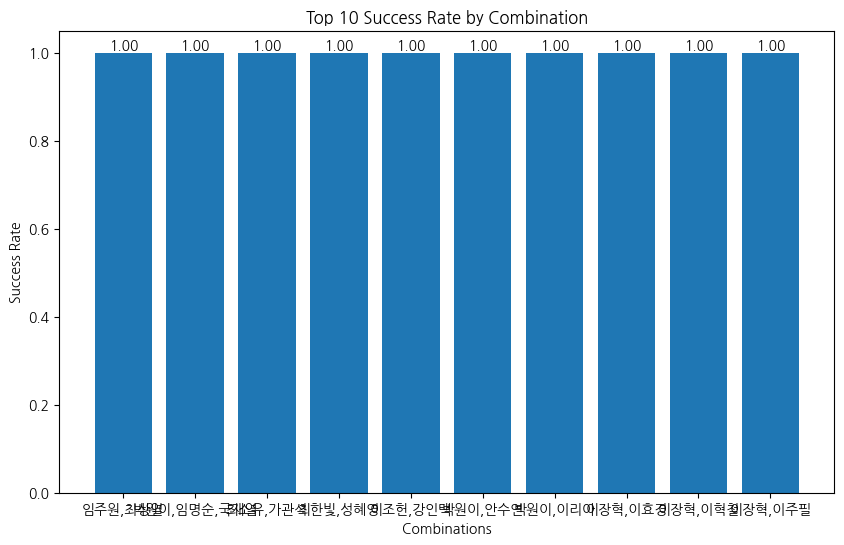

In [30]:
import pandas as pd
import matplotlib.pyplot as plt


# '조합' 별 '성공여부'의 '성공' 비율 계산
success_rate_by_combination = df.groupby('조합')['성공여부'].apply(lambda x: x[x == '성공'].count() / x.count())

# 가장 높은 순서로 정렬하고 상위 10개만 추출
sorted_success_rate = success_rate_by_combination.sort_values(ascending=False).head(10)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(sorted_success_rate.index, sorted_success_rate.values)
plt.xlabel("Combinations")
plt.ylabel("Success Rate")
plt.title("Top 10 Success Rate by Combination")

# 레이블 달기
for i, (combination, rate) in enumerate(sorted_success_rate.items()):
    plt.text(i, rate, f"{rate:.2f}", ha='center', va='bottom')

plt.show()



In [52]:
import pandas as pd



# 개별 조합의 성공 및 실패 횟수 계산
success_counts = df.groupby(['조합', '성공여부']).size().unstack(fill_value=0)
success_counts.reset_index(inplace=True)

# 새로운 데이터프레임 'comb' 생성 및 열 추가
comb = pd.DataFrame()
comb['people'] = success_counts['조합']
comb['success'] = success_counts['성공']
comb['total'] = success_counts['성공'] + success_counts['실패']
comb['ratio'] = comb['success'] / comb['total']
comb['대분류'] = df['대분류']
print(comb)


       people  success  total     ratio     대분류
0     강규주,가관석       38     52  0.730769      의류
1     강규주,가성훈       10     18  0.555556      식품
2     강규주,강승필       17     23  0.739130      식품
3     강규주,강인택      107    137  0.781022      식품
4     강규주,강주우       28     38  0.736842      식품
...       ...      ...    ...       ...     ...
1018  하재원,최상열        2      3  0.666667      보석
1019  하재원,최성철        4      4  1.000000      보석
1020  하재원,최영란       72     77  0.935065  문화/서비스
1021  하재원,최조환        1      1  1.000000      의류
1022  하재원,표승모        1      2  0.500000      식품

[1023 rows x 5 columns]


In [51]:
import pandas as pd
import matplotlib.pyplot as plt


# # 조합별 성공과 실패 횟수 계산
# success_counts = df.groupby(['조합', '성공여부', '대분류']).size().unstack(fill_value=0)
# success_counts.reset_index(inplace=True)

# # 새로운 데이터프레임 'comb' 생성 및 열 추가
# comb = pd.DataFrame()
# comb['people'] = success_counts['조합']
# comb['category'] = success_counts['대분류']
# comb['success'] = success_counts['성공']
# comb['total'] = success_counts['성공'] + success_counts['실패']
# comb['ratio'] = comb['success'] / comb['total']

# 대분류가 '의류'인 경우의 people별 ratio 상위 및 하위 5개 추출
clothing_comb = comb[comb['대분류'] == '식품'].sort_values(by='ratio', ascending=False)

top_5 = clothing_comb.head(50)
bottom_5 = clothing_comb.tail(50)

# 그래프 그리기
plt.figure(figsize=(12, 8))

plt.scatter(top_5['people'], top_5['ratio'], color='blue', label='Top 50')
plt.scatter(bottom_5['people'], bottom_5['ratio'], color='red', label='Bottom 50')

plt.xlabel("People")
plt.ylabel("Ratio")
plt.title("Top 50 and Bottom 50 Ratios in 식품 Category")

plt.xticks(rotation=45)
plt.legend()

for _, row in top_5.iterrows():
    plt.annotate(row['people'], (row['people'], row['ratio']), textcoords="shift_points", xytext=(0, 5), ha='center', size=9)

for _, row in bottom_5.iterrows():
    plt.annotate(row['people'], (row['people'], row['ratio']), textcoords="shift_points", xytext=(0, 5), ha='center', size=9)

plt.show()

plt.show()


ValueError: 'shift_points' is not a recognized coordinate

<Figure size 1200x800 with 1 Axes>

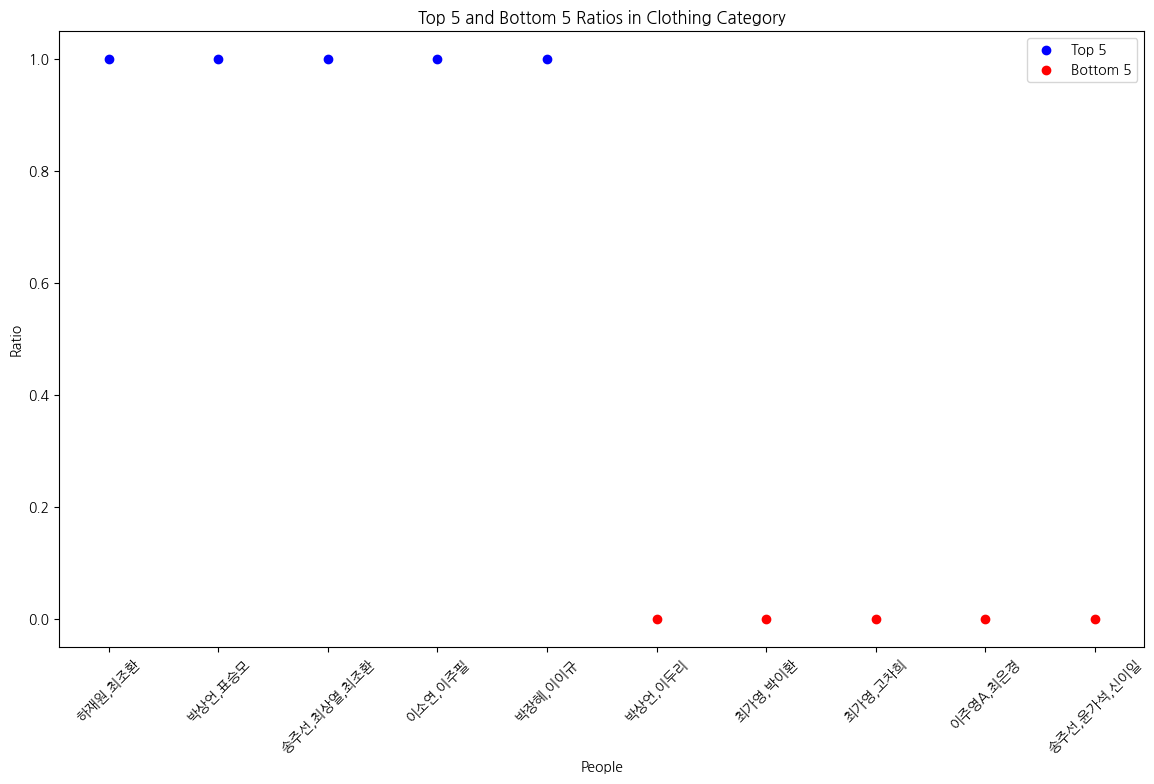

In [54]:
import pandas as pd
import matplotlib.pyplot as plt



# # 조합별 성공과 실패 횟수 계산
# success_counts = df.groupby(['조합', '성공여부', '대분류']).size().unstack(fill_value=0)
# success_counts.reset_index(inplace=True)

# # 새로운 데이터프레임 'comb' 생성 및 열 추가
# comb = pd.DataFrame()
# comb['people'] = success_counts['조합']
# comb['대분류'] = success_counts['대분류']
# comb['success'] = success_counts['성공']
# comb['total'] = success_counts['성공'] + success_counts['실패']
# comb['ratio'] = comb['success'] / comb['total']

# 대분류가 '의류'인 경우의 people별 ratio 상위 및 하위 5개 추출
clothing_comb = comb[comb['대분류'] == '의류'].sort_values(by='ratio', ascending=False)

top_5 = clothing_comb.head(5)
bottom_5 = clothing_comb.tail(5)

# 그래프 그리기
plt.figure(figsize=(14, 8))

plt.scatter(top_5['people'], top_5['ratio'], color='blue', label='Top 5')
plt.scatter(bottom_5['people'], bottom_5['ratio'], color='red', label='Bottom 5')

plt.xlabel("People")
plt.ylabel("Ratio")
plt.title("Top 5 and Bottom 5 Ratios in Clothing Category")

plt.xticks(rotation=45)
plt.legend()

# 각 점 옆에 조합 값 표시
?
plt.show()


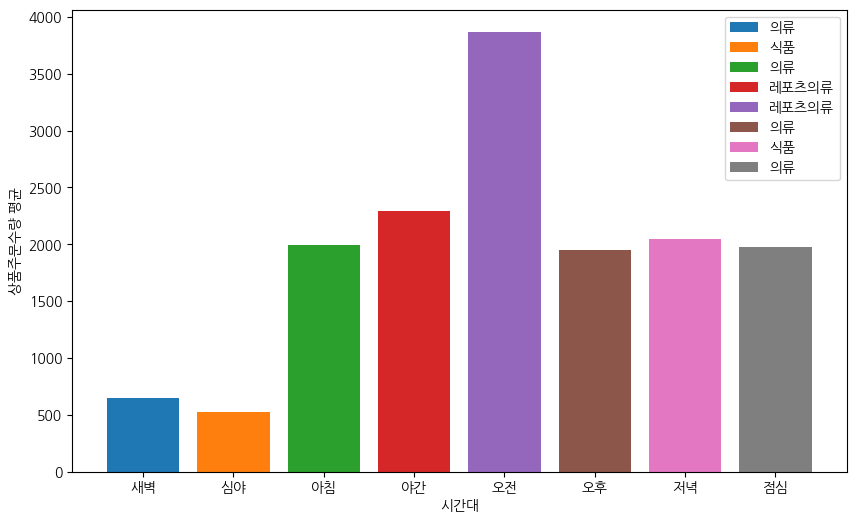

In [97]:
import pandas as pd
import matplotlib.pyplot as plt



# '시간대'와 '대분류'로 그룹화하여 '매출액'의 평균 계산
grouped = df.groupby(['시간대', '대분류'])['상품주문수량'].mean().reset_index()

# '시간대'별로 '매출액' 평균이 가장 높은 '대분류' 찾기
max_categories = grouped.groupby('시간대')['상품주문수량'].idxmax()
max_categories_data = grouped.loc[max_categories]

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))

for i, row in max_categories_data.iterrows():
    ax.bar(row['시간대'], row['상품주문수량'], label=row['대분류'])

ax.set_xlabel('시간대')
ax.set_ylabel('상품주문수량 평균')
ax.legend()

plt.show()


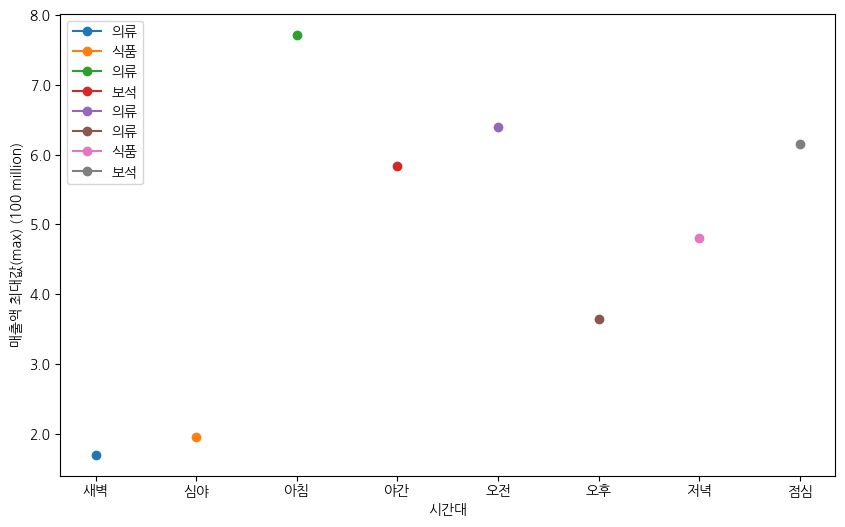

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


# '시간대'와 '대분류'로 그룹화하여 '매출액'의 평균 계산
grouped = df.groupby(['시간대', '대분류'])['매출액'].max().reset_index()

# '시간대'별로 '매출액' 평균이 가장 높은 '대분류' 찾기
max_categories = grouped.groupby('시간대')['매출액'].idxmax()
max_categories_data = grouped.loc[max_categories]

# 매출액 평균의 단위를 100 million으로 변환하는 함수
def format_millions(x, pos):
    return f'{x/100000000:.1f}'

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))

for i, row in max_categories_data.iterrows():
    ax.plot(row['시간대'], row['매출액'], marker='o', label=row['대분류'], linestyle='-')

# Y축의 값에 대한 포맷 설정
ax.yaxis.set_major_formatter(FuncFormatter(format_millions))

ax.set_xlabel('시간대')
ax.set_ylabel('매출액 최대값(max) (100 million)')
ax.legend()

plt.show()


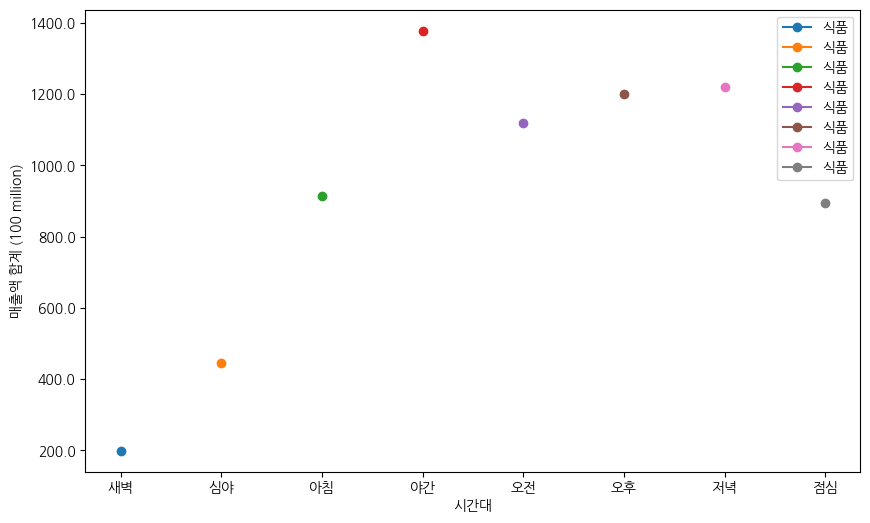

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter



# '시간대'와 '대분류'로 그룹화하여 '매출액'의 평균 계산
grouped = df.groupby(['시간대', '대분류'])['매출액'].sum().reset_index()

# '시간대'별로 '매출액' 평균이 가장 높은 '대분류' 찾기
max_categories = grouped.groupby('시간대')['매출액'].idxmax()
max_categories_data = grouped.loc[max_categories]

# 매출액 평균의 단위를 100 million으로 변환하는 함수
def format_millions(x, pos):
    return f'{x/100000000:.1f}'

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))

for i, row in max_categories_data.iterrows():
    ax.plot(row['시간대'], row['매출액'], marker='o', label=row['대분류'])

# Y축의 값에 대한 포맷 설정
ax.yaxis.set_major_formatter(FuncFormatter(format_millions))

ax.set_xlabel('시간대')
ax.set_ylabel('매출액 합계 (100 million)')
ax.legend()

plt.show()


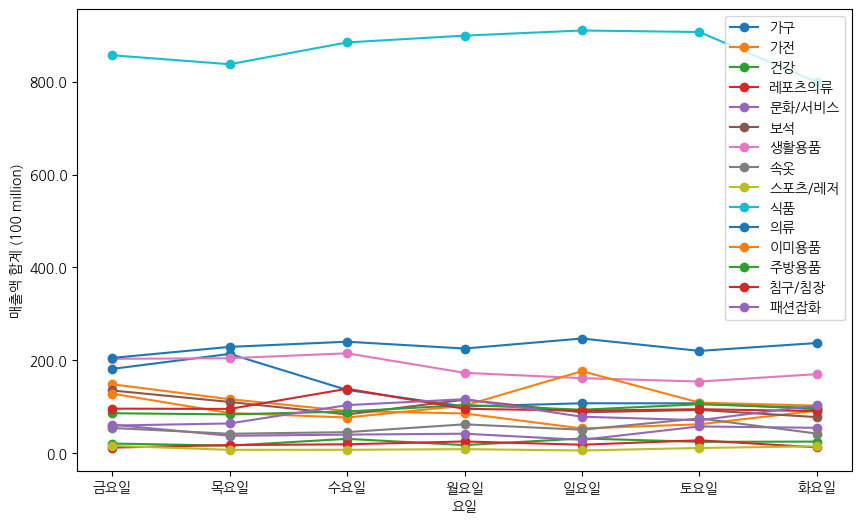

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter



# '시간대'와 '대분류'로 그룹화하여 '상품주문수량'의 평균 계산
grouped = df.groupby(['요일', '대분류'])['매출액'].sum().reset_index()

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))

for category, data in grouped.groupby('대분류'):
    ax.plot(data['요일'], data['매출액'], marker='o', label=category)

# Y축의 값에 대한 포맷 설정
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x/100000000:.1f}'))

ax.set_xlabel('요일')
ax.set_ylabel('매출액 합계 (100 million)')
ax.legend()

plt.show()


/tmp/ipykernel_9470/1043741839.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(weekday_order)


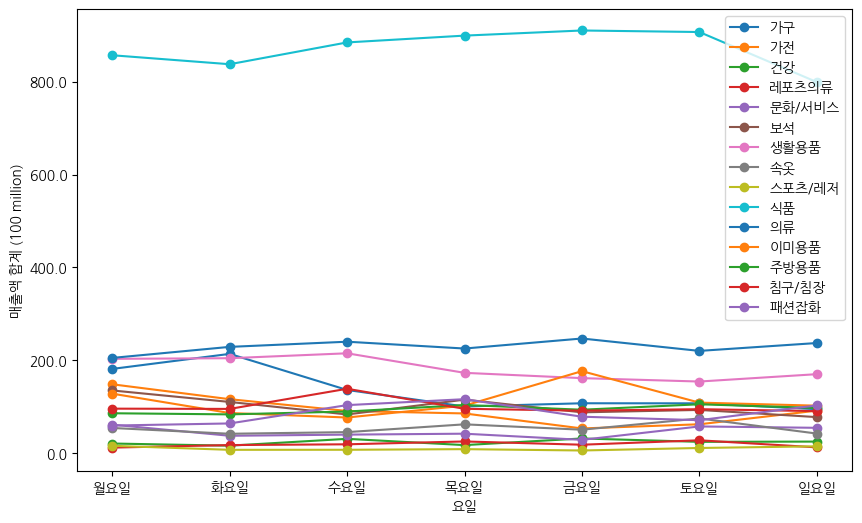

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# '시간대'와 '대분류'로 그룹화하여 '매출액'의 평균 계산
grouped = df.groupby(['요일', '대분류'])['매출액'].sum().reset_index()

# 요일 순서를 정의
weekday_order = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))

for category, data in grouped.groupby('대분류'):
    ax.plot(data['요일'], data['매출액'], marker='o', label=category)

# Y축의 값에 대한 포맷 설정
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x/100000000:.1f}'))

ax.set_xlabel('요일')
ax.set_ylabel('매출액 합계 (100 million)')
ax.legend()

# x축 레이블 순서 설정
ax.set_xticklabels(weekday_order)

plt.show()
